In [45]:
import pandas as pd
from glob import glob
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn import metrics, cross_validation
from sklearn.metrics import  mean_squared_error, r2_score

In [46]:
from pathlib import Path
relative = Path("bike/*")
absolute = relative.absolute()  # absolute is a Path object
data_list = glob(str(absolute))
day_df = pd.read_csv(data_list[2])
day_df.head()


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [47]:
day_df.iloc[:,-1].describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

In [48]:
day_df['High'] = day_df.cnt.map(lambda x: 1 if x>143 else 0)

In [49]:
X = day_df[['windspeed']]
y = day_df['High']

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [51]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [52]:
predicted = model.predict(X_test)
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))

0.552550824703


In [53]:
predicted = model.predict(X_test)
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))

0.552550824703


In [54]:
test_data = day_df.windspeed.max()
print(model.predict(test_data))
probs = model.predict_proba(test_data)
print(probs)

[1]
[[ 0.28778417  0.71221583]]


[1]
AUC: 0.568


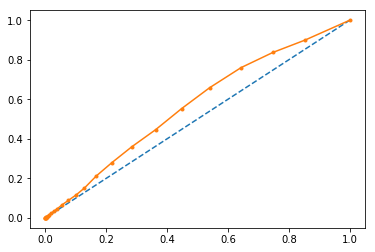

In [55]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
print(model.predict(test_data))
probs = model.predict_proba(X_test)
probs = probs[:, 1]
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
# plot no skill
pyplot.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
pyplot.plot(fpr, tpr, marker='.')
# show the plot
pyplot.show()